REGRESIÓN LINEAL SIMPLE

In [24]:
#Importacion ded librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Ruta de los archivos
https://drive.google.com/file/d/1z3PkQ4-TLCeE50TMDFll2aybhC2Zf1Ix/view?usp=sharing


In [25]:
#Importacion de los datos
dataset = pd.read_csv("/content/student_scores.csv", sep = ",")

In [26]:
#Vemos el dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [27]:
#Shape
dataset.shape

(25, 2)

In [5]:
#Analisis estadistico basico
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


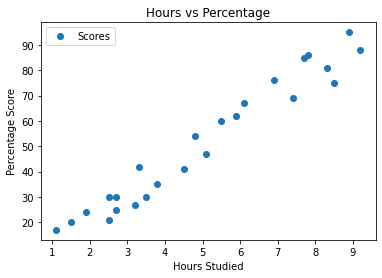

In [6]:
#Ploteamos el dataset
dataset.plot(x='Hours', y='Scores', style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [28]:
#Preparacion de datos
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [31]:
#Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
#Entrenando el modelo
#Paso 1
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#Paso 2
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
#Recuperamos la intersección
print(regressor.intercept_)

2.018160041434662


In [35]:
#La pendiente
print(regressor.coef_)

[9.91065648]


In [36]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

El y_pred es una matriz numpy que contiene todos los valores predichos para los valores de entrada en la X_test

In [37]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


REGRESIÓN LINEAL MÚLTIPLE

In [49]:
dataset = pd.read_csv("/content/petrol_consumption.csv", sep = ",")

In [39]:
#Vemos el head
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [40]:
#Estadisticas
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [53]:
from sklearn.preprocessing import StandardScaler
#Paso 1
scaler = StandardScaler()
#Paso 2
scaler.fit(X)
# Paso 3
X1 = scaler.transform(X)

In [41]:
#Preparación de datos
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [56]:
#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

In [57]:
#Entrenamiento del modelo
#Paso 1
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#Paso 2
regressor.fit(X_train, y_train)

LinearRegression()

Como se dijo anteriormente, en caso de regresión lineal multivariable, el modelo de regresión tiene que encontrar los coeficientes más óptimos para todos los atributos. Para ver qué coeficientes ha elegido nuestro modelo de regresión, podemos ejecutar el siguiente script:

In [58]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-37.648225
Average_income,-37.129347
Paved_Highways,-16.378979
Population_Driver_licence(%),73.654019


In [60]:
X1

array([[ 1.4154413 , -1.18184136, -1.03892124, -0.8259031 ],
       [ 1.4154413 , -0.26396904, -1.24905478,  0.03036408],
       [ 1.4154413 , -0.66388654, -1.1518029 ,  0.17611169],
       [-0.17892312,  1.10667332, -0.93038119, -0.7530293 ],
       [ 0.35253169,  0.27688855, -1.48610625, -0.47975254],
       [ 2.47835091,  1.93821984, -1.22503125,  0.01214563],
       [ 0.35253169,  1.89769956,  1.82422057, -2.17406847],
       [ 0.35253169,  1.5576816 , -0.99203194, -0.31578648],
       [ 0.35253169,  0.3614526 ,  0.87167309, -0.7530293 ],
       [-0.71037792,  0.47596642,  0.85141228, -0.33400493],
       [ 0.35253169,  0.26279454,  0.10813001, -0.73481085],
       [-0.17892312,  1.5576816 ,  2.4951428 , -0.8259031 ],
       [-0.71037792,  1.01330051,  0.39496518,  0.06680099],
       [-0.71037792, -0.06136766,  0.29366114, -0.46153409],
       [-0.71037792,  0.15885122,  0.75068711,  0.68622832],
       [-0.71037792,  0.13418671,  1.38195604,  0.2854224 ],
       [-0.71037792, -0.

In [47]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:

In [48]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734
